In [54]:
import numpy as np
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn import datasets
import matplotlib.pyplot as plt

In [55]:
#Data
data = datasets.load_iris()

#print(data)

In [56]:
x = data.data
y = data.target
z = data.target_names

In [57]:
#split dataset
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.3)

#data shapes
print(x_train.shape)
print(x_validation.shape)

(105, 4)
(45, 4)


In [58]:
#Build model
model = Sequential()
model.add(Dense(100,input_shape=(4,), activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               500       
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 3)                 303       
                                                                 
Total params: 803
Trainable params: 803
Non-trainable params: 0
_________________________________________________________________


In [60]:
#compile model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [61]:
#fit the model
hist = model.fit(x_train,y_train, epochs=30)

Epoch 1/30
4/4 [==============================] - 1s 9ms/step - loss: 1.6435 - accuracy: 0.2857
Epoch 2/30
4/4 [==============================] - 0s 4ms/step - loss: 1.5076 - accuracy: 0.4000
Epoch 3/30
4/4 [==============================] - 0s 7ms/step - loss: 1.5637 - accuracy: 0.2952
Epoch 4/30
4/4 [==============================] - 0s 4ms/step - loss: 1.3545 - accuracy: 0.3048
Epoch 5/30
4/4 [==============================] - 0s 5ms/step - loss: 1.2918 - accuracy: 0.3619
Epoch 6/30
4/4 [==============================] - 0s 7ms/step - loss: 1.1501 - accuracy: 0.3619
Epoch 7/30
4/4 [==============================] - 0s 5ms/step - loss: 1.2124 - accuracy: 0.3524
Epoch 8/30
4/4 [==============================] - 0s 6ms/step - loss: 1.1599 - accuracy: 0.3714
Epoch 9/30
4/4 [==============================] - 0s 12ms/step - loss: 0.9611 - accuracy: 0.5238
Epoch 10/30
4/4 [==============================] - 0s 10ms/step - loss: 0.9949 - accuracy: 0.5048
Epoch 11/30
4/4 [====================

Text(0.5, 0, 'epoch')

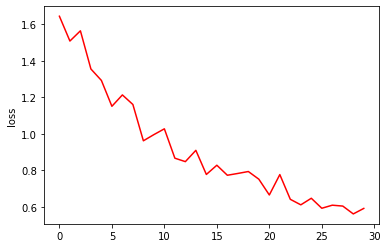

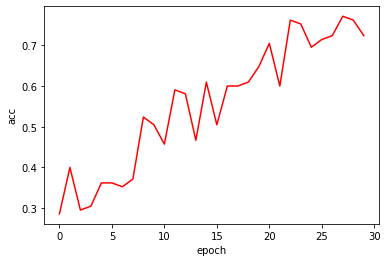

In [62]:
plt.figure()
#plt.plot(hist.history['validation_loss'], 'b')
plt.plot(hist.history['loss'], 'r')
plt.ylabel('loss')

plt.figure()
#plt.plot(hist.history['validation_accuracy'], 'b')
plt.plot(hist.history['accuracy'], 'r')
plt.ylabel('acc')
plt.xlabel('epoch')

In [63]:
#evaluate
model.evaluate(x_validation, y_validation)

2/2 [==============================] - 1s 4ms/step - loss: 0.5084 - accuracy: 0.8889


[0.5084112286567688, 0.8888888955116272]

In [64]:
#prediction for 1st 10 obs.
pred = model.predict(x_validation[:10])
print(pred)

[[0.8449598  0.12710586 0.02793434]
 [0.0297967  0.44049102 0.52971226]
 [0.02669209 0.4337697  0.5395382 ]
 [0.8645413  0.1078722  0.0275865 ]
 [0.04962933 0.41099513 0.53937554]
 [0.02633864 0.38055283 0.59310853]
 [0.01842089 0.36303923 0.6185399 ]
 [0.10914941 0.52163875 0.36921188]
 [0.06934124 0.51814276 0.41251606]
 [0.21496862 0.49760464 0.2874268 ]]


In [65]:
p = np.argmax(pred, axis=1)

print(p)
print(y_validation[:10])

[0 2 2 0 2 2 2 1 1 1]
[0 2 2 0 2 2 2 1 1 1]


In [66]:
#prediction result

for i in p:
	print("prediction-class: {}, Name: {}".format(i,z[i]))

prediction-class: 0, Name: setosa
prediction-class: 2, Name: virginica
prediction-class: 2, Name: virginica
prediction-class: 0, Name: setosa
prediction-class: 2, Name: virginica
prediction-class: 2, Name: virginica
prediction-class: 2, Name: virginica
prediction-class: 1, Name: versicolor
prediction-class: 1, Name: versicolor
prediction-class: 1, Name: versicolor
